# Try a simple regression method to predict the closing price of Bitcoin from the opening.

In [1]:
import csv
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import pandas as pd
from stockstats import StockDataFrame
import sys

# Old Method

In [2]:
pd.options.mode.chained_assignment = None
%matplotlib inline

### Filter Dataset

### Get Data from API Cryptowatch

In [3]:
sys.path.append('src')
from src.cryptowatch.api_client import Client
client = Client()

In [4]:
one_hour = 3600
twelve_hour = 43200
day = 86400

timelapse= twelve_hour
data = {
    'exchange': 'bitfinex',
    'pair': 'btcusd',
    'route': 'ohlc',
    'params': {
        'periods': timelapse,
        #'before': 1480032000,
        'after': 1356868800,
    }
}

dataset = client.get_markets(data=data)

In [5]:
dataset

{'result': {'43200': [[1410220800,
    464.88,
    479.98,
    464.53,
    471.1,
    8408.945912,
    0.0],
   [1410264000, 471.16, 472, 463.22, 468.91, 3464.6376768, 0.0],
   [1410307200, 468.91, 479.7, 463, 473.06, 5912.19485991, 0.0],
   [1410350400, 473.09, 484, 472, 482, 3810.04960604, 0.0],
   [1410393600, 482.27, 489.99, 476.41, 478.12, 5070.81800872, 0.0],
   [1410436800, 478.1, 480.6, 473.2, 474.89, 3043.80240318, 0.0],
   [1410480000, 475, 478.9, 472.2, 477.38, 2069.48099451, 0.0],
   [1410523200, 477.04, 477.98, 467, 473.02, 2227.37808199, 0.0],
   [1410566400, 473.37, 474.37, 470.4, 474.37, 1231.21064715, 0.0],
   [1410609600, 474.34, 483.93, 472.86, 479.28, 6234.5661074, 0.0],
   [1410652800, 479.28, 483.8, 477.8, 478.69, 1746.22492759, 0.0],
   [1410696000, 478.69, 480.85, 475.33, 479.51, 1220.1629116, 0.0],
   [1410739200, 480.31, 481.56, 475.72, 476.5, 1902.36329348, 0.0],
   [1410782400, 477.12, 480.18, 475.13, 477.61, 2780.30671717, 0.0],
   [1410825600, 477.64, 480.

### Create dataframe from live data.

In [6]:
#df_json = pd.read_json(dataset)
df = pd.DataFrame(dataset['result'][str(timelapse)], columns=['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Nada'])

In [7]:
df['Date'] = pd.to_datetime(df['Date'],unit='s').dt.tz_localize('UTC').dt.tz_convert('America/Argentina/Buenos_Aires')

In [8]:
df.count()

Date      3158
Open      3158
High      3158
Low       3158
Close     3158
Volume    3158
Nada      3158
dtype: int64

In [9]:
df = df.drop('Nada', axis=1)

In [10]:
df.tail()

,Date,Open,High,Low,Close,Volume
3153,2018-12-30 09:00:00-03:00,3893.9000,3992.4,3838.9,3966.8,8785.619542
3154,2018-12-30 21:00:00-03:00,3968.3000,4003.8,3850.0,3979.6,8942.396095
3155,2018-12-31 09:00:00-03:00,3979.4000,3986.9,3850.1,3870.6,9214.859712
3156,2018-12-31 21:00:00-03:00,3870.4000,3939.6,3771.0,3834.7,6533.438443
3157,2019-01-01 09:00:00-03:00,3832.6287,3846.2,3822.4,3845.8,188.715137


### Delete rows with values in 0

In [11]:
df = df[(df['Open']>0)]

### Use StockDataFrame library for generate technical indicators

In [12]:
medida = 'open'
stock = StockDataFrame.retype(df)
stock.get(medida+'_3_sma')
stock.get(medida+'_7_sma')
stock.get(medida+'_30_sma')
stock['wr_7']
stock['rsi_14']
stock[medida+'_5_mstd']
stock.head(7)

,open,high,low,close,volume,open_3_sma,open_7_sma,open_30_sma,wr_7,close_-1_s,close_-1_d,rs_14,rsi_14,open_5_mstd
date,,,,,,,,,,,,,,
2014-09-08 21:00:00-03:00,464.88,479.98,464.53,471.10,8408.945912,464.880000,464.880000,464.880000,57.475728,NaN,NaN,NaN,NaN,NaN
2014-09-09 09:00:00-03:00,471.16,472.00,463.22,468.91,3464.637677,468.020000,468.020000,468.020000,66.050119,471.10,-2.19,0.000000,0.000000,4.440631
2014-09-09 21:00:00-03:00,468.91,479.70,463.00,473.06,5912.194860,468.316667,468.316667,468.316667,40.753828,468.91,4.15,2.040745,67.113319,3.181766
2014-09-10 09:00:00-03:00,473.09,484.00,472.00,482.00,3810.049606,471.053333,469.510000,469.510000,9.523810,473.06,8.94,6.775121,87.138464,3.527785
2014-09-10 21:00:00-03:00,482.27,489.99,476.41,478.12,5070.818009,474.756667,472.062000,472.062000,43.979252,482.00,-3.88,2.108792,67.833163,6.472826
2014-09-11 09:00:00-03:00,478.10,480.60,473.20,474.89,3043.802403,477.820000,473.068333,473.068333,55.946647,478.12,-3.23,1.303762,56.592735,5.420160
2014-09-11 21:00:00-03:00,475.00,478.90,472.20,477.38,2069.480995,478.456667,473.344286,473.344286,46.721008,474.89,2.49,1.620689,61.842100,5.051626


### Way without stockDataFrame

In [13]:
#dataset['H-L'] = dataset['High'] - dataset['Low']
#dataset['O-C'] = dataset['Close'] - dataset['Open']
#dataset['3day MA'] = dataset['Close'].shift(1).rolling(window = 3).mean()
#dataset['7day MA'] = dataset['Close'].shift(1).rolling(window = 7).mean()
#dataset['30day MA'] = dataset['Close'].shift(1).rolling(window = 30).mean()
#dataset['Std_dev']= dataset['Close'].rolling(5).std()

## Train Model

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso 

In [15]:
medias = [medida+value for value in ['_3_sma', '_7_sma', '_30_sma', '_5_mstd']]
listado = ['open', ','.join(medias), 'rsi_14', 'wr_7']
listado

['open', 'open_3_sma,open_7_sma,open_30_sma,open_5_mstd', 'rsi_14', 'wr_7']

In [16]:
y = stock['close'][6:-1]
# Check if Series contains NaN
y.isnull().values.any()

False

In [17]:
X = stock[['open', medida+'_3_sma', medida+'_7_sma', medida+'_30_sma', medida+'_5_mstd', 'rsi_14', 'wr_7']][6:-1]
# Check if exist missing (NaN)
X.isnull().any()

open           False
open_3_sma     False
open_7_sma     False
open_30_sma    False
open_5_mstd    False
rsi_14         False
wr_7           False
dtype: bool

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=4)

In [19]:
print(len(X))
print(len(X_train))
print(len(X_test))

3136
1881
1255


In [20]:
model = Lasso()

In [21]:
model.fit(X_train,y_train)

/home/henry/.local/share/virtualenvs/finan_notes-_UF2nig5/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [22]:
predicted = model.predict(X_test)

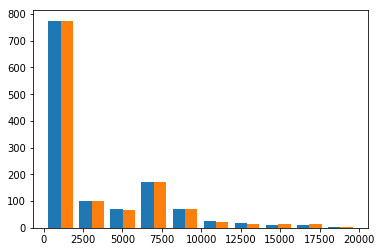

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist([predicted, y_test]);

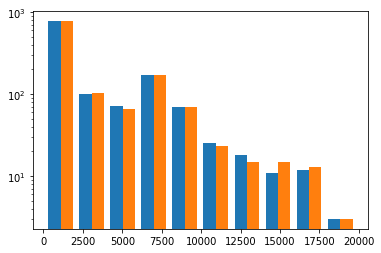

In [24]:
plt.hist([predicted, y_test], log=True);

In [25]:
model.score(X_test,y_test)

0.9972213238222609

# Predict price from time lapse

In [26]:
p = stock.tail(1)
p

,open,high,low,close,volume,open_3_sma,open_7_sma,open_30_sma,wr_7,close_-1_s,close_-1_d,rs_14,rsi_14,open_5_mstd
date,,,,,,,,,,,,,,
2019-01-01 09:00:00-03:00,3832.6287,3846.2,3822.4,3845.8,188.715137,3894.1429,3940.446957,3931.694653,77.243687,3834.7,11.1,0.922192,47.976061,63.291326


In [27]:
print(timelapse)
print(medida)
model.predict(p[['open', medida+'_3_sma', medida+'_7_sma', medida+'_30_sma', medida+'_5_mstd', 'rsi_14', 'wr_7']])

43200
open


array([3758.94539456])

# 2018-04-07 09:00
#close 6662.11
#open 6627.58

#2018-04-07 21:00
12H
close 6505.76

> **WARNING:** This is for educational purposes only. The cryptocurrency market is exceptionally volatile. Please do not mistake this for investment advice, 